# Customer Segmentation using K-means Clustering

In this notebook, we will explore the application of K-means clustering for customer segmentation using the "Mall Customer Segmentation Data" dataset. Customer segmentation is a valuable technique in business and marketing that helps identify distinct groups of customers based on their characteristics and behaviors. By understanding these segments, businesses can tailor their marketing strategies, improve customer satisfaction, and optimize revenue.

## Dataset Overview

The "Mall Customer Segmentation Data" dataset contains information about customers of a mall. The dataset includes the following features:

- `CustomerID`: Unique identifier for each customer
- `Gender`: Gender of the customer (Male or Female)
- `Age`: Age of the customer
- `Annual Income (k$)`: Annual income of the customer in thousands of dollars
- `Spending Score (1-100)`: Score assigned to the customer based on their spending behavior and purchasing history

## Feature Importance

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [27]:
# Load the Mall Customer Segmentation Data
data = pd.read_csv("./Mall_Customers.csv")

# Select all features except 'CustomerID'
X = data.drop(['CustomerID'], axis=1)

In [28]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
# Encode Gender with label encoding
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

In [30]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [32]:
import numpy as np

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [33]:
# Determine the number of components to retain (e.g., 80% cumulative explained variance)
threshold = 0.8
n_components = np.argmax(cumulative_explained_variance >= threshold) + 1

print(f"Number of components to retain: {n_components}")
print(f"Cumulative explained variance: {cumulative_explained_variance[n_components - 1]:.2f}")

Number of components to retain: 3
Cumulative explained variance: 0.83


In [34]:
# Get the loadings (coefficients) of each feature in the selected principal components
loadings = pca.components_[:n_components]

# Get the feature names
feature_names = X.columns

In [35]:
# Print the loadings for each selected principal component
for i, component in enumerate(loadings):
    print(f"\nPrincipal Component {i+1}:")
    for feature, loading in zip(feature_names, component):
        print(f"{feature}: {loading:.3f}")


Principal Component 1:
Gender: 0.234
Age: 0.688
Annual Income (k$): -0.006
Spending Score (1-100): -0.687

Principal Component 2:
Gender: 0.627
Age: -0.104
Annual Income (k$): 0.765
Spending Score (1-100): 0.103

Principal Component 3:
Gender: -0.743
Age: 0.122
Annual Income (k$): 0.644
Spending Score (1-100): -0.137


y = a + b*X1 + c*X2 + d*X3 + e*X4

In [36]:
# Identify the most important features based on the loadings
important_features = []
for component in loadings:
    max_loading_index = np.argmax(np.abs(component))
    important_features.append(feature_names[max_loading_index])

print("\nMost important features:")
print(", ".join(important_features))


Most important features:
Age, Annual Income (k$), Gender


## K-means Clustering

In [37]:
# Only use most important features Age and Annual Income (k$)
X = X[['Age', 'Annual Income (k$)']]
X_scaled = scaler.fit_transform(X)

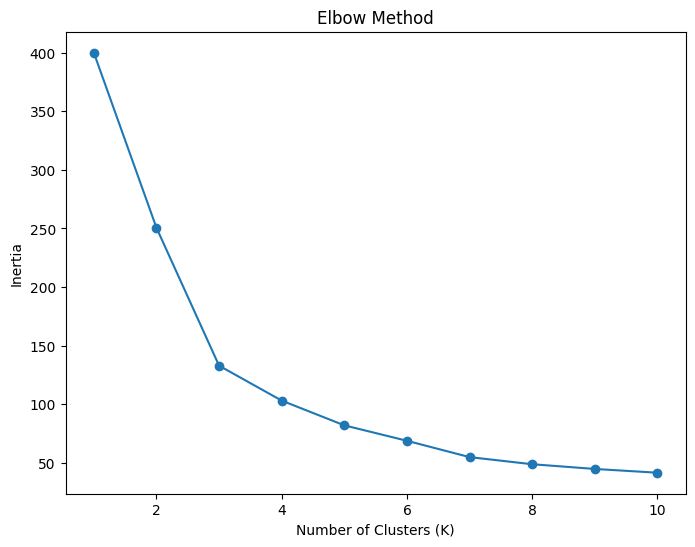

In [38]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
inertia_values = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_) # WCSS

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [39]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Evaluate the clustering performance using silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4437863926928188


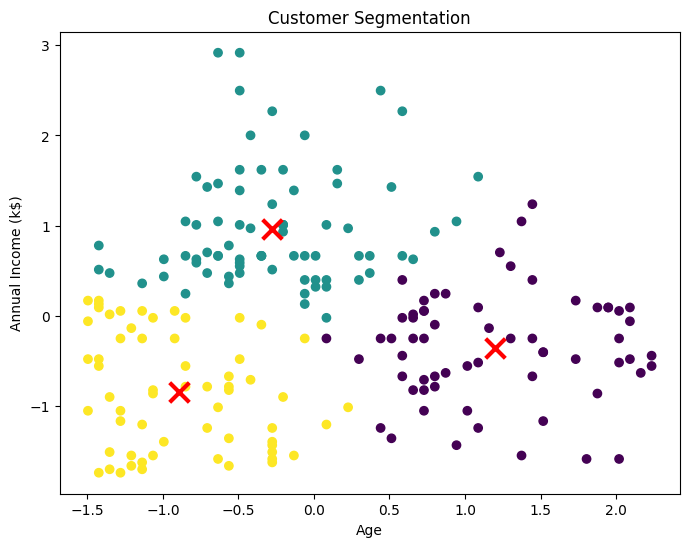

In [40]:
# Visualize the customer segments
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='red')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Customer Segmentation')
plt.show()

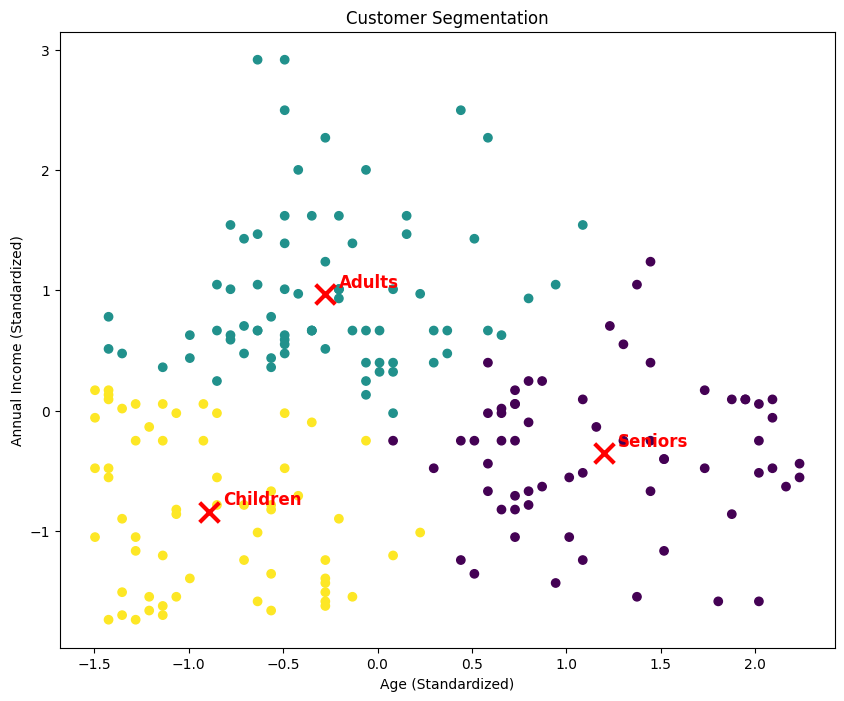

In [41]:
# Assign labels to the clusters based on their characteristics
cluster_labels = ['Seniors', 'Adults', 'Children']

# Visualize the customer segments with cluster labels
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='red')

# Annotate the cluster centroids with labels
for i, label in enumerate(cluster_labels):
    plt.annotate(label, (centroids[i, 0], centroids[i, 1]),
                 xytext=(10, 5), textcoords='offset points',
                 fontsize=12, color='red', fontweight='bold')

plt.xlabel('Age (Standardized)')
plt.ylabel('Annual Income (Standardized)')
plt.title('Customer Segmentation')
plt.show()

| Cluster | Label                          | Suggestions for Stakeholders                                                                                |
|---------|--------------------------------|------------------------------------------------------------------------------------------------------------|
| 0       | Children | Offer entertaining toy-like products at a cheaper price                                 |
| 1       | Adults     | Provide discounts and have daily groceries available                             |
| 2       | Seniors     | Provide senior discount to enourage spending and loyalty                    |